<a href="https://colab.research.google.com/github/farazahmed943/stock_prediction_task/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ojective : To predict future 5 days using last 60 days

In [72]:
# Refrences taken from internet for LSTM implementation

In [69]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Using google stock data from https://raw.githubusercontent.com/PacktPublishing/Learning-Pandas-Second-Edition/master/data/goog.csv

In [3]:
gstock_data = pd.read_csv('/content/GOOG (1).csv')
gstock_data .head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-09,2499.500000,2505.00000,2487.330078,2491.399902,2491.399902,1006300
1,2021-06-10,2494.010010,2523.26001,2494.000000,2521.600098,2521.600098,1561700
2,2021-06-11,2524.919922,2526.98999,2498.290039,2513.929932,2513.929932,1262000
3,2021-06-14,2513.389893,2528.22998,2500.939941,2527.040039,2527.040039,1127500
4,2021-06-15,2530.439941,2537.23999,2512.969971,2520.659912,2520.659912,1109100


In [4]:
# Date - trading day
# Open - opening value of the stock on that particular date
# High - the highest value the stock touched on particular trading date
# Low - lowest price value of stock touched on particular trading date
# Close - closing value of stock at the end of trading day
# Adj close - accounts for any ammends to stock closing price taking in account for any corporate actions
# volume - number of shares traded on a particular day

# EDA

In [5]:
# Missing Value
gstock_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
gstock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [66]:
# Univariate time series analysis using LSTM
# For this we will be using open and date
time_df = gstock_data[['Date','Open']]

In [67]:
time_df

,Date,Open
0,2021-06-09,2499.500000
1,2021-06-10,2494.010010
2,2021-06-11,2524.919922
3,2021-06-14,2513.389893
4,2021-06-15,2530.439941
...,...,...
248,2022-06-02,2283.760010
249,2022-06-03,2319.850098
250,2022-06-06,2334.850098
251,2022-06-07,2312.959961


# Let's visualize the time series

In [68]:
time_df = time_df.set_index('Date')

In [16]:
time_df

,Open
Date,
2021-06-09,2499.500000
2021-06-10,2494.010010
2021-06-11,2524.919922
2021-06-14,2513.389893
2021-06-15,2530.439941
...,...
2022-06-02,2283.760010
2022-06-03,2319.850098
2022-06-06,2334.850098


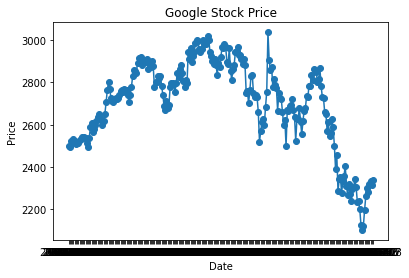

In [18]:
# Plot

plt.plot(time_df["Open"], marker='o')

# Labelling 

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Google Stock Price")
# Display

plt.show()

In [19]:
# Lets try and see the decomposition of time series
results = seasonal_decompose(time_df['Open'])
results.plot();

AttributeError: ignored

In [20]:
# adding frequency to dataset
time_df.index.freq='MS'

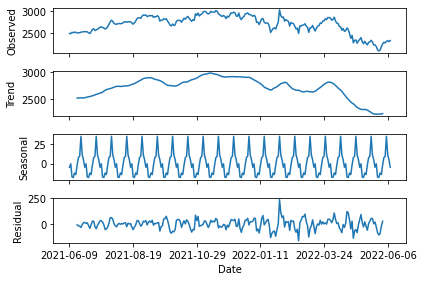

In [21]:
# Lets try again and see the decomposition of time series
results = seasonal_decompose(time_df['Open'] ,model='additive',freq=12)
results.plot();

In [22]:
# We can see that the stock price is having a flat trend with seasonal component

In [23]:
#Let's select last 65 days data (using last 60 days to train and 5 days to forecast)

In [24]:
last_65_df = time_df.tail(65)

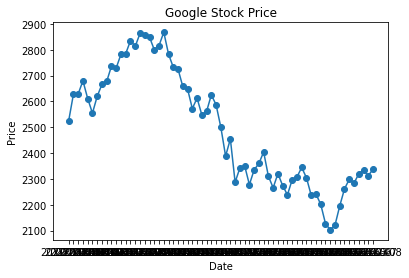

In [25]:
#Visualise time series
# Plot

plt.plot(last_65_df["Open"], marker='o')

# Labelling 
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Google Stock Price")
# Display

plt.show()

In [26]:
#Transforming data into one scale
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()

last_65_df [ last_65_df.columns] = Ms.fit_transform(last_65_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [27]:
#This transform brings the mean to 0 and standard deviation 1

In [28]:
train_data = last_65_df [:60]
test_data  = last_65_df [60:]

In [29]:
# We want data and labels for LSTM model input
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(2,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [30]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [31]:
test_seq

array([[[0.2364503 ],
        [0.28361764]],

       [[0.28361764],
        [0.30322164]],

       [[0.30322164],
        [0.27461269]]])

In [32]:
#Let's checkout the labels,as we can see due to standardization the entire dataset is suqished between 0&1 with mean centered at 0 
train_label

array([[0.68798272],
       [0.75429651],
       [0.66473232],
       [0.59072084],
       [0.67589359],
       [0.73656134],
       [0.75127742],
       [0.82873939],
       [0.81965627],
       [0.88862317],
       [0.89212566],
       [0.95698894],
       [0.92903345],
       [0.99375282],
       [0.98615946],
       [0.9751421 ],
       [0.91140293],
       [0.93269293],
       [1.        ],
       [0.88922431],
       [0.82274077],
       [0.8131216 ],
       [0.72555706],
       [0.71310194],
       [0.61385349],
       [0.66673197],
       [0.5820557 ],
       [0.59949031],
       [0.68331688],
       [0.63276478],
       [0.51906157],
       [0.37345623],
       [0.46024957],
       [0.24128589],
       [0.31295823],
       [0.32506045],
       [0.2290921 ],
       [0.3038097 ],
       [0.33618246],
       [0.39413169],
       [0.2712407 ],
       [0.21333072],
       [0.28487225],
       [0.22396902],
       [0.17763829],
       [0.25363634],
       [0.26771204],
       [0.315

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [34]:
model = Sequential()
model.add(LSTM(units=2, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=2))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 2)              32        
                                                                 
 dropout (Dropout)           (None, 2, 2)              0         
                                                                 
 lstm_1 (LSTM)               (None, 2)                 40        
                                                                 
 dense (Dense)               (None, 2)                 6         
                                                                 
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
2/2 [==============================] - 6s 1s/step - loss: 0.3339 - mean_absolute_error: 0.4995 - val_loss: 0.0779 - val_mean_absolute_error: 0.2771
Epoch 2/80
2/2 [==============================] - 0s 39ms/step - loss: 0.3320 - mean_absolute_error: 0.4975 - val_loss: 0.0760 - val_mean_absolute_error: 0.2737
Epoch 3/80
2/2 [==============================] - 0s 43ms/step - loss: 0.3256 - mean_absolute_error: 0.4915 - val_loss: 0.0742 - val_mean_absolute_error: 0.2704
Epoch 4/80
2/2 [==============================] - 0s 37ms/step - loss: 0.3224 - mean_absolute_error: 0.4875 - val_loss: 0.0723 - val_mean_absolute_error: 0.2670
Epoch 5/80
2/2 [==============================] - 0s 33ms/step - loss: 0.3144 - mean_absolute_error: 0.4819 - val_loss: 0.0705 - val_mean_absolute_error: 0.2637
Epoch 6/80
2/2 [==============================] - 0s 37ms/step - loss: 0.3117 - mean_absolute_error: 0.4787 - val_loss: 0.0687 - val_mean_absolute_error: 0.2603
Epoch 7/80
2/2 [====================

In [ ]:
# mean_absolute error = 0.0176 we are getting this much low error as the dataset is small and we are overfitting

In [36]:
test_seq

array([[[0.2364503 ],
        [0.28361764]],

       [[0.28361764],
        [0.30322164]],

       [[0.30322164],
        [0.27461269]]])

In [37]:
test_predicted = model.predict(test_seq)

In [38]:
#here we are going back from standard form to actual form
test_inverse_predicted = Ms.inverse_transform(test_predicted)

In [55]:
test_inverse_predicted.flatten()[:5]

array([2312.078 , 2326.2117, 2313.5354, 2334.8533, 2313.4497],
      dtype=float32)

In [69]:
concat_df = pd.concat([time_df.iloc[len(time_df)-5:].copy(),pd.DataFrame(test_inverse_predicted.flatten()[:5],columns=['open_predicted'],index=last_65_df.iloc[-5:].index)], axis=1)

# 5 days forward Prediction

In [71]:
concat_df

,Open,open_predicted
Date,,
2022-06-02,2283.760010,2312.077881
2022-06-03,2319.850098,2326.211670
2022-06-06,2334.850098,2313.535400
2022-06-07,2312.959961,2334.853271
2022-06-08,2337.530029,2313.449707


numpy.ndarray